In [ ]:
# Montem l'unitat de Drive a Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Data_cleaning_final/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Data_cleaning_final/'
/content


In [4]:
!pip install category_encoders joblib lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.5 MB/s eta 0:00:00


In [5]:
import joblib
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, confusion_matrix, average_precision_score, f1_score

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Carregar dades
df = pd.read_csv('data_final.csv')
df.replace('--', np.nan, inplace=True)

/tmp/ipython-input-2219187534.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_final.csv')


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df

,codi,cognoms_nom,cognoms,nom,sexe,edat,municipi_naixement,comarca_naixement,provincia_naixement,comunitat_autonoma_naixement,pais_naixement,municipi_residencia,comarca_residencia,provincia_residencia,comunitat_autonoma_residencia,pais_residencia,tipus_procediment_1,tipus_procediment_2,any_inicial,any_aprovacio_sen_o_altra_resol,pena,commutacio_indult_demanat,afusellades,municipi_naixement_longitud_etrs89,municipi_naixement_latitud_etrs89,municipi_residencia_longitud_etrs89,municipi_residencia_latitud_etrs89,anys_pena,mesos_pena,tipus_pena,Naixement_Longitud_REAL,Naixement_Latitud_REAL,Residencia_Longitud_REAL,Residencia_Latitud_REAL
0,135218,"Abad Alfonso, Erundina",Abad Alfonso,Erundina,Dona,43.0,Alcoi,Alcoià,Alacant,Comunitat Valenciana,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1942.0,1943.0,Sobreseïment,NaN,NaN,-47318376.0,3.869837e+09,217634927.0,4.138425e+09,0,0,Sobreseïment,-0.473184,38.698369,2.176349,41.384247
1,25335,"Abad Arbós, Ricardo",Abad Arbós,Ricardo,Home,30.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,NaN,NaN,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,217634927.0,4.138425e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,2.176349,41.384247,2.176349,41.384247
2,123192,"Abad Baras, José",Abad Baras,José,Home,30.0,Benavarri,Ribagorça,Osca,Aragó,Espanya,Lleida,Segrià,Lleida,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1939.0,Absolt,NaN,NaN,48188113.0,4.210699e+09,62061934.0,4.161527e+09,0,0,Absolució,0.481881,42.106994,0.620619,41.615274
3,171,"Abad Batllone, Juan",Abad Batllone,Juan,Home,42.0,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1939.0,1939.0,Sense declaració de responsabilitats,NaN,NaN,217634927.0,4.138425e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,2.176349,41.384247,2.176349,41.384247
4,24485,"Abad Boira, Ricardo",Abad Boira,Ricardo,Home,48.0,Tauste,NaN,Saragossa,Aragó,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1941.0,1942.0,Sense declaració de responsabilitats,NaN,NaN,-125694062.0,4.192139e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,-1.256941,41.921394,2.176349,41.384247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69741,127208,"Zurita Del Moral, José",Zurita Del Moral,José,Home,64.0,Antequera,NaN,Màlaga,Andalusia,Espanya,Tortosa,Baix Ebre,Tarragona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1940.0,1942.0,Sobreseïment,NaN,NaN,-455804451.0,3.701422e+08,52500631.0,4.081102e+09,0,0,Sobreseïment,-4.558045,3.701422,0.525006,40.811021
69742,100026,"Zurita Martínez, Mariano",Zurita Martínez,Mariano,Home,49.0,Montarrón,NaN,Guadalajara,Castella-la Manxa,Espanya,Barcelona,Barcelonès,Barcelona,Catalunya,Espanya,Diligències prèvies,Diligències prèvies,1941.0,1943.0,Sense declaració de responsabilitats,NaN,NaN,-311915129.0,4.090668e+09,217634927.0,4.138425e+09,0,0,Sense declaració de responsabilitats,-3.119151,40.906684,2.176349,41.384247
69743,67026,"Zurita Omella, Nicolás",Zurita Omella,Nicolás,Home,22.0,Cretes,Matarranya,Terol,Aragó,Espanya,Blanes,Selva,Girona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1939.0,1940.0,Vint anys de reclusió temporal,NaN,NaN,2117607.0,4.092857e+09,279229296.0,4.167592e+09,20,0,Reclusió,0.021176,40.928573,2.792293,41.675922
69744,120572,"Zurita Sala, Odón",Zurita Sala,Odón,Home,42.0,Palamós,Baix Empordà,Girona,Catalunya,Espanya,Palamós,Baix Empordà,Girona,Catalunya,Espanya,Consells de guerra,Sumaríssim,1942.0,1942.0,Sobreseïment,NaN,NaN,312865803.0,4.184675e+09,312865803.0,4.184675e+09,0,0,Sobreseïment,3.128658,41.846747,3.128658,41.846747


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69746 entries, 0 to 69745
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   codi                                 69746 non-null  int64  
 1   cognoms_nom                          69746 non-null  object 
 2   cognoms                              69746 non-null  object 
 3   nom                                  69746 non-null  object 
 4   sexe                                 69746 non-null  object 
 5   edat                                 69746 non-null  float64
 6   municipi_naixement                   67196 non-null  object 
 7   comarca_naixement                    50658 non-null  object 
 8   provincia_naixement                  66445 non-null  object 
 9   comunitat_autonoma_naixement         66443 non-null  object 
 10  pais_naixement                       67362 non-null  object 
 11  municipi_residencia         

In [ ]:
print(df.isnull().sum())

codi                                       0
cognoms_nom                                0
cognoms                                    0
nom                                        0
sexe                                       0
edat                                       0
municipi_naixement                      2550
comarca_naixement                      19088
provincia_naixement                     3301
comunitat_autonoma_naixement            3303
pais_naixement                          2384
municipi_residencia                      706
comarca_residencia                      2645
provincia_residencia                     886
comunitat_autonoma_residencia            886
pais_residencia                          670
tipus_procediment_1                     3728
tipus_procediment_2                    13997
any_inicial                               12
any_aprovacio_sen_o_altra_resol         4087
pena                                      14
commutacio_indult_demanat              54416
afusellade

In [ ]:
# Eliminem columnes inneccesaries
drop_cols = [
    'codi', 'cognoms_nom', 'cognoms', 'nom', 'pena', "comarca_naixement",
    "comarca_residencia", "tipus_procediment_1", 'tipus_pena',
    'municipi_naixement_longitud_etrs89', 'municipi_naixement_latitud_etrs89',
    'municipi_residencia_longitud_etrs89', 'municipi_residencia_latitud_etrs89'
]

df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)

In [ ]:
# Codifiquem la variable objectiu "afusellat"
df['afusellat'] = np.where(df['afusellades'] == 'executat/da', 1, 0)
df.drop(columns=['afusellades'], inplace=True)

In [ ]:
# Modifiquem les variables per als models
df['any_inicial'] = pd.to_numeric(df['any_inicial'], errors='coerce')
df['any_aprov'] = pd.to_numeric(df['any_aprovacio_sen_o_altra_resol'], errors='coerce')
df['delay_resol'] = df['any_aprov'] - df['any_inicial']
df.drop(columns=['any_aprovacio_sen_o_altra_resol', 'anys_pena', 'mesos_pena',
    'commutacio_indult_demanat', 'any_aprov'], inplace=True)

In [ ]:
# Revisem algunes variables
print("Valor mínim d'Edat:", df['edat'].min())
print("Valor màxim d'Edat:", df['edat'].max())
print("Valor mínim de delay_resol:", df['delay_resol'].min())
print("Valor màxim de delay_resol:", df['delay_resol'].max())

Valor mínim d'Edat: 12.0
Valor màxim d'Edat: 9999.0
Valor mínim de delay_resol: -1.0
Valor màxim de delay_resol: 32.0


In [ ]:
# Netejem aquestes variables
df['edat'] = df['edat'].replace(9999, np.nan)
df['delay_resol'] = df['delay_resol'].apply(lambda x: x if x >= 0 else 0)

In [ ]:
# Separació train/test
target = 'afusellat'
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Definició de grups de variables
num_feats = ['edat','any_inicial','delay_resol']
cat_low = [
    'sexe', 'tipus_procediment_2',
    'comunitat_autonoma_naixement', 'comunitat_autonoma_residencia',
    'pais_naixement', 'pais_residencia'
]
cat_high = [
    'municipi_naixement', 'municipi_residencia',
    'provincia_naixement', 'provincia_residencia'
]


In [ ]:
# Preprocessing pipelines
tuple_num = ('num', Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]), num_feats)

tuple_cat_low = ('cat_low', Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Desconegut')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01))
]), cat_low)

tuple_cat_high = ('cat_high', Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Desconegut')),
    ('target_enc', TargetEncoder(smoothing=2))
]), cat_high)

preprocessor = ColumnTransformer(
    transformers=[tuple_num, tuple_cat_low, tuple_cat_high],
    remainder='drop'
)

In [ ]:
models = {
    'LogisticRegression': (
        LogisticRegression(class_weight='balanced', solver='saga', max_iter=500),
        {
            'clf__C':         [0.01, 0.1, 1, 10],
            'clf__penalty':   ['l1', 'l2']
        }
    ),
    'RandomForest': (
        RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        {
            'clf__n_estimators':    [200, 500],
            'clf__max_depth':       [None, 10, 20],
            'clf__min_samples_leaf':[1, 2],
            'clf__min_samples_split':[2, 5]
        }
    ),
    'LightGBM': (
        LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
        {
               'clf__n_estimators': [200, 500],
               'clf__learning_rate': [0.01, 0.05, 0.1],
               'clf__num_leaves': [31, 63],
               'clf__subsample': [0.7, 1.0],
               'clf__colsample_bytree': [0.7, 1.0]
        }
    ),
    'LinearSVC': (
        CalibratedClassifierCV(
            estimator=LinearSVC(class_weight='balanced', max_iter=5000),
            cv=3
        ),
        {
            'clf__estimator__C': [0.01, 0.1, 1, 10]
        }
    ),
    'NeuralNetwork': (
        MLPClassifier(
            hidden_layer_sizes=(50,),
            max_iter=300,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10,
            random_state=42
        ),
        {
            'clf__hidden_layer_sizes': [(50,), (100,)],
            'clf__alpha':              [0.0001, 0.001, 0.01],
            'clf__learning_rate_init': [0.001, 0.01]
        }
    ),
}

In [ ]:
all_pipelines = {}
for name, (clf, params) in models.items():

    pipeline = ImbPipeline([
        ('preproc', preprocessor),
        ('adasyn', ADASYN(random_state=42)),
        ('clf', clf)
    ])

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=params,
        cv=StratifiedKFold(5, shuffle=True, random_state=42),
        n_iter=10,
        scoring='f1',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    print(f"\nEntrenant {name}...")
    search.fit(X_train, y_train)
    best_pipe = search.best_estimator_
    all_pipelines[name] = best_pipe

    # Predicció de probabilitats i classes
    y_score = best_pipe.predict_proba(X_test)[:, 1]
    y_pred  = best_pipe.predict(X_test)

    # Mètriques
    roc = roc_auc_score(y_test, y_score)
    ap  = average_precision_score(y_test, y_score)
    f1  = f1_score(y_test, y_pred)
    print(f"{name}: ROC AUC={roc:.3f}, AP={ap:.3f}, F1={f1:.3f}")


Entrenant LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
LogisticRegression: ROC AUC=0.790, AP=0.142, F1=0.194

Entrenant RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomForest: ROC AUC=0.785, AP=0.152, F1=0.250

Entrenant LightGBM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 52897, number of negative: 53102
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4350
[LightGBM] [Info] Number of data points in the train set: 105999, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM: ROC AUC=0.770, AP=0.149, F1=0.238

Entrenant LinearSVC...
Fitting 

LogisticRegression - Precisió: 0.7024 | Sensitivitat: 0.7389 | Especificitat: 0.7006 | ROC AUC: 0.7901


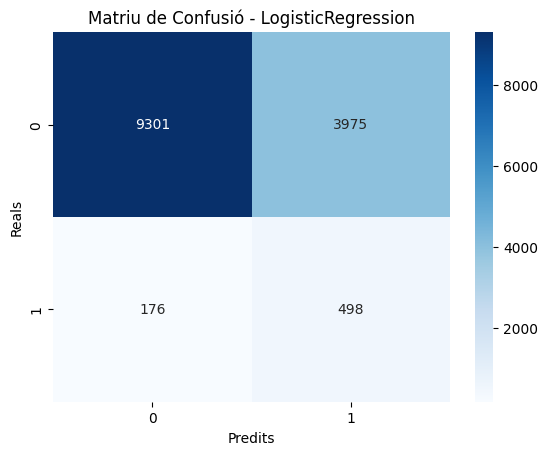

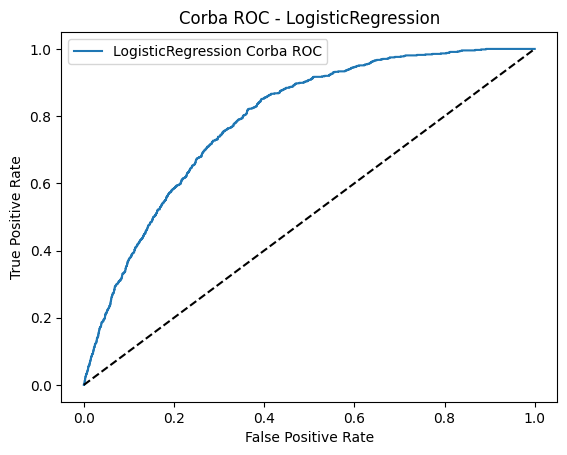

RandomForest - Precisió: 0.8707 | Sensitivitat: 0.4466 | Especificitat: 0.8922 | ROC AUC: 0.7850


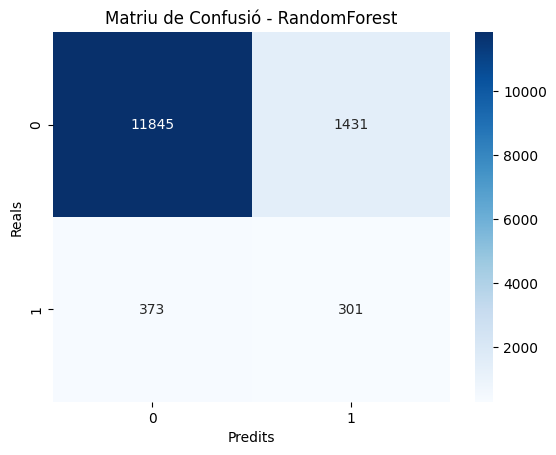

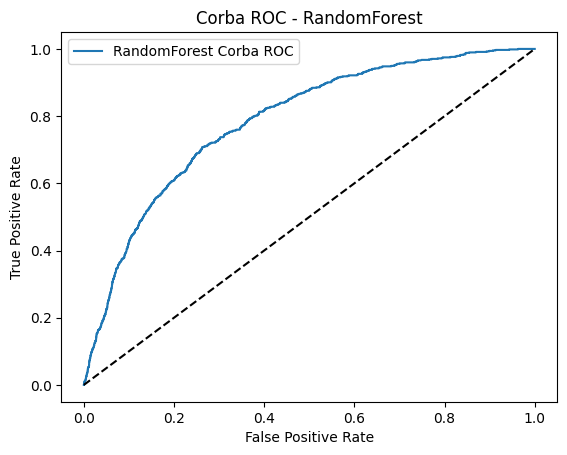

LightGBM - Precisió: 0.8984 | Sensitivitat: 0.3279 | Especificitat: 0.9274 | ROC AUC: 0.7700


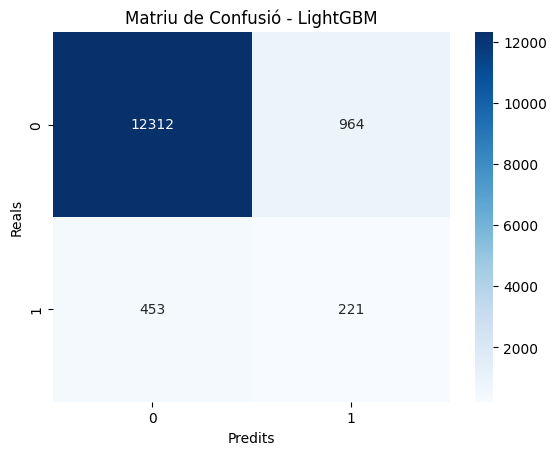

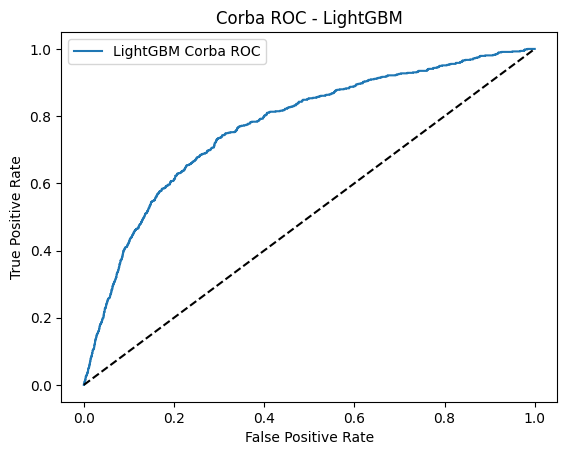

LinearSVC - Precisió: 0.6963 | Sensitivitat: 0.7537 | Especificitat: 0.6934 | ROC AUC: 0.7904


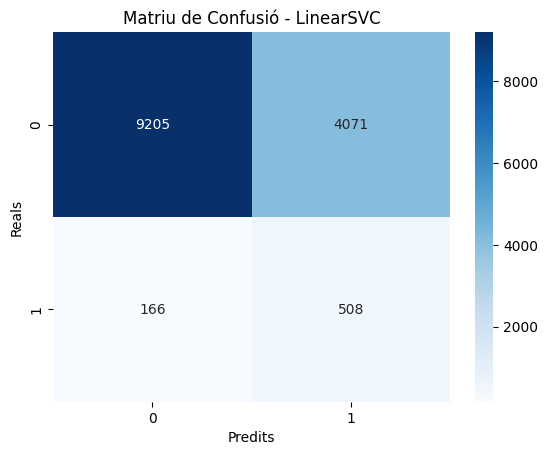

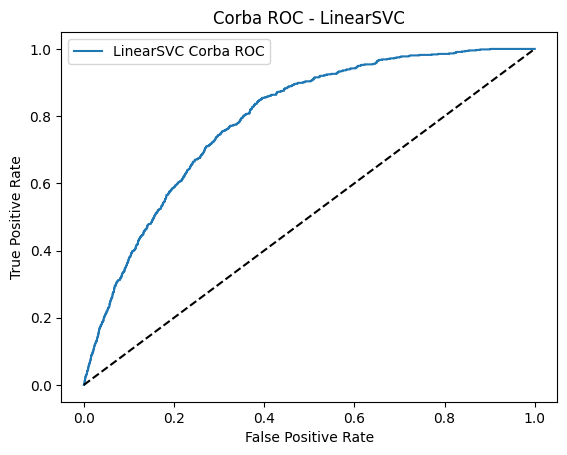

NeuralNetwork - Precisió: 0.7211 | Sensitivitat: 0.7181 | Especificitat: 0.7212 | ROC AUC: 0.7900


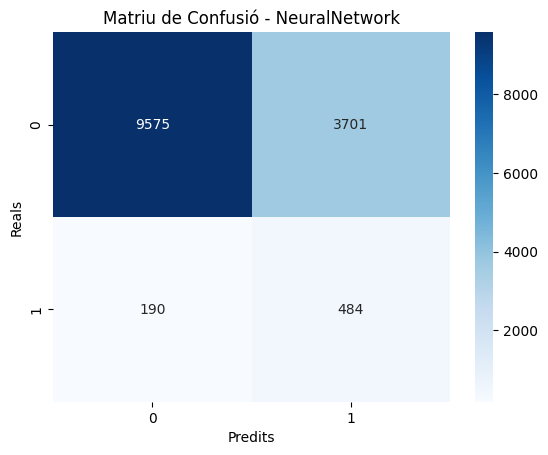

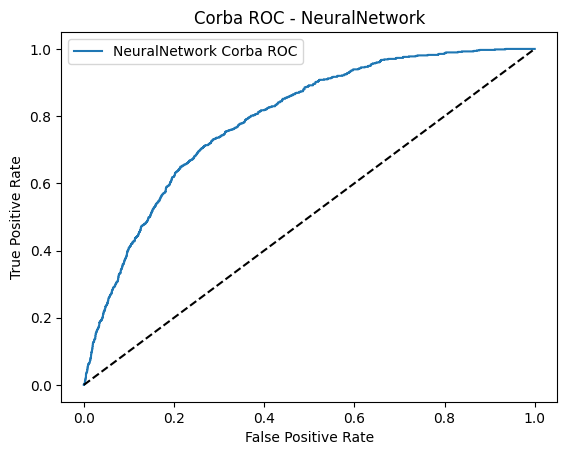

In [ ]:
for name, pipe in all_pipelines.items():
    # Predicció de clases i de probabilitats
    y_pred  = pipe.predict(X_test)
    y_score = pipe.predict_proba(X_test)[:, 1]

    # Càlculo de mètriques
    metrics = {
        "Precisió":    accuracy_score(y_test, y_pred),
        "Sensitivitat": recall_score(y_test, y_pred),
        "Especificitat": recall_score(y_test, y_pred, pos_label=0),
        "ROC AUC":     roc_auc_score(y_test, y_score)
    }
    print(f"{name} - " + " | ".join(f"{k}: {v:.4f}" for k, v in metrics.items()))

    #Matriu de confussió
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriu de Confusió - {name}')
    plt.xlabel('Predits')
    plt.ylabel('Reals')
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} Corba ROC')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Corba ROC - {name}')
    plt.legend()
    plt.show()

In [ ]:
# 13) Exportar tots els pipelines per a la app Shiny
#best_pipeline = all_pipelines['RandomForest']
joblib.dump(all_pipelines, 'models.pkl')
print('Models Exportats')

Models Exportats
